In [242]:
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))
path="E:\surya\work\kaggle titanic dataset"
os.chdir(path)
# Any results you write to the current directory are saved as output.

In [243]:
print (os.listdir(os.getcwd()))

['.~lock.submission.csv#', 'all.zip', 'gender_submission.csv', 'submission.csv', 'test.csv', 'train.csv']


In [244]:
#Step 1: Dataset Exploration

In [245]:
print ("\ntotal number of datapoints : 891")
print ("\nnumber of useful features available : 9")
print ("\nname of the passenger is not used as a feature.")
print ("\ncabin number has many missing values")


total number of datapoints : 891

number of useful features available : 9

name of the passenger is not used as a feature.

cabin number has many missing values


In [246]:
#reading training dataset
feature_list=['PassengerId','Pclass','Name','Sex', 'Age','SibSp','Parch',
                                                   'Ticket','Fare','Cabin','Embarked']
df_train_features=pd.read_csv("train.csv",usecols=feature_list)
df_train_labels=pd.read_csv("train.csv",usecols=['Survived'])

In [247]:
df_train_features.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [248]:
df_train_labels.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [249]:
#DATA PRE-PROCESSING

#replacing 'male' with 1 and 'female' with 0 in the 'sex' column
df_train_features=df_train_features.replace('male',1)
df_train_features=df_train_features.replace('female',0)

#extracting the numerical part of the ticket number
c=5
for s in df_train_features.iloc[:,7]:
    if isinstance(s,str):
        value=[int(s) for s in s.split(' ') if s.isdigit()]
        if (len(value)!=0):
            tktnum=value[0]
        else:
            tktnum=-1
        if (c>0):
            c-=1
        df_train_features=df_train_features.replace(s,tktnum)

#In 'embarked' column, replacing 'S' by 1,'C' by 2 and 'Q' by 3
df_train_features=df_train_features.replace({"S":1,"C":2,"Q":3})

#Extracting only the surnames
for s in df_train_features.iloc[:,2]:
    if (len(s)!=0):
        value=[s for s in s.split(',')]
        surname=value[0]
    df_train_features=df_train_features.replace(s,surname)

#finding the list of unique surnames present and assigning them a numerical value
ls=df_train_features.Name.unique()
df_train_features=df_train_features.replace(ls,range(len(ls)))

#For cases where a passenger has more than one cabin number, extra features will be added. 
#If a person has two cabins, then 4 features will be added. 2 for alpha. part and 2 for numerical part.    
#splitting cabin number in two parts: cabin1 : contains the alphabetical part and cabin2 : contains the numerical part

#first let us find the maximum number of cabins a passenger has.
Max=0
for s in df_train_features.iloc[:,9]:
    if isinstance(s,str):
        value=[s for s in s.split(' ')]
        if (Max<len(value)):
            Max=len(value)
print ('maximum number of cabins a passenger has : ',Max)

#now let us add the required number of features with default values for each row. Later on the value of a row will be changed as 
#'needed'
x=range(Max)
for i in x:
    df_train_features.loc[:,'ap'+str(i)]=-1
    df_train_features.loc[:,'np'+str(i)]=-1
    feature_list.append('ap'+str(i))
    feature_list.append('np'+str(i))
#now let us fill in the apprpriate values in these new columns
ap=11
np=12
rowin=0

for s in df_train_features.iloc[:,9]:
    if isinstance(s,str):
        #print (s)
        #print (type(s))
        value=[s for s in s.split(' ')]
        for cn in value:
            #print (cn[0])
            #print (cn[1:])
            #print (ap)
            df_train_features.iloc[rowin,ap]=ord(cn[0])
            if (cn[1:]!=''):
                df_train_features.iloc[rowin,np]=int(cn[1:])
            else:
                df_train_features.iloc[rowin,np]=-1
            ap+=2
            np+=2
    ap=11
    np=12
    rowin+=1
    
            
#finally removing the original 'cabin' column
df_train_features=df_train_features.drop(columns=['Cabin'])
#removing from features list as well
del feature_list[feature_list.index('Cabin')]

#replacing all the missing values in age column by mean age
mean_age=df_train_features['Age'].mean()
df_train_features['Age']=df_train_features['Age'].fillna(mean_age)

#there are two nan values present in 'Embarked' column. we are replacing it with median value
median=df_train_features['Embarked'].median()
df_train_features['Embarked']=df_train_features['Embarked'].fillna(median)





            
            
            



maximum number of cabins a passenger has :  4


In [250]:
df_train_features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ap0,np0,ap1,np1,ap2,np2,ap3,np3
0,1,3,0,1,22.000000,1,0,21171,7.2500,1.0,-1,-1,-1,-1,-1,-1,-1,-1
1,2,1,1,0,38.000000,1,0,17599,71.2833,2.0,67,85,-1,-1,-1,-1,-1,-1
2,3,3,2,0,26.000000,0,0,3101282,7.9250,1.0,-1,-1,-1,-1,-1,-1,-1,-1
3,4,1,3,0,35.000000,1,0,113803,53.1000,1.0,67,123,-1,-1,-1,-1,-1,-1
4,5,3,4,1,35.000000,0,0,373450,8.0500,1.0,-1,-1,-1,-1,-1,-1,-1,-1
5,6,3,5,1,29.699118,0,0,330877,8.4583,3.0,-1,-1,-1,-1,-1,-1,-1,-1
6,7,1,6,1,54.000000,0,0,17463,51.8625,1.0,69,46,-1,-1,-1,-1,-1,-1
7,8,3,7,1,2.000000,3,1,349909,21.0750,1.0,-1,-1,-1,-1,-1,-1,-1,-1
8,9,3,8,0,27.000000,0,2,347742,11.1333,1.0,-1,-1,-1,-1,-1,-1,-1,-1
9,10,2,9,0,14.000000,1,0,237736,30.0708,2.0,-1,-1,-1,-1,-1,-1,-1,-1


In [251]:
#Converting dataframe to numpy arrays for further use
X=df_train_features.values
y=df_train_labels.values
print (X.shape)
print (y.shape)

(891, 18)
(891, 1)


In [252]:
#Step 2: OPTIMIZE FEATURE SELECTION/ENGINEERING

In [253]:
#First, let us do feature scalling so that no feature gets more importance simply based on it's numerical value
#feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [254]:
X[0:5]

array([[0.        , 1.        , 0.        , 1.        , 0.27117366,
        0.125     , 0.        , 0.00682677, 0.01415106, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.0011236 , 0.        , 0.0015015 , 0.        , 0.4722292 ,
        0.125     , 0.        , 0.00567501, 0.13913574, 0.5       ,
        0.8       , 0.57718121, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.00224719, 1.        , 0.003003  , 0.        , 0.32143755,
        0.        , 0.        , 0.99998871, 0.01546857, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.00337079, 0.        , 0.0045045 , 0.        , 0.43453129,
        0.125     , 0.        , 0.03669537, 0.1036443 , 0.        ,
        0.8       , 0.83221477, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
    

In [255]:
print (y[:5])

[[0]
 [1]
 [1]
 [1]
 [0]]


In [256]:
len(y)

891

In [257]:
new=[]
for i in y:
    for j in i:
        new.append(j)
print (new[:5])
y=new

[0, 1, 1, 1, 0]


In [258]:
#now let us find the importance of all features using selectkpercentile
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=40)#highest accuracy .80 (approx.) from decision tree classifier
#                                                                                                   at this percentile
selector.fit(X,y)
X_new=selector.transform(X)
print ('shape of X_new ',X_new.shape)
try:
    X_points = range(X.shape[1])
except IndexError:
    X_points = 1

shape of X_new  (891, 7)


In [259]:
#checking out the scores of the features
score=selector.scores_.tolist()
names=list(df_train_features)
new=zip(names,score)
for i in new:
    print (i[0]," score = {:8.2f}".format(i[1]))

PassengerId  score =     0.02
Pclass  score =   115.03
Name  score =     0.27
Sex  score =   372.41
Age  score =     4.35
SibSp  score =     1.11
Parch  score =     5.96
Ticket  score =     8.20
Fare  score =    63.03
Embarked  score =    10.26
ap0  score =    98.85
np0  score =    53.15
ap1  score =     3.97
np1  score =     4.91
ap2  score =     1.97
np2  score =     2.67
ap3  score =     3.22
np3  score =     3.22


<BarContainer object of 18 artists>

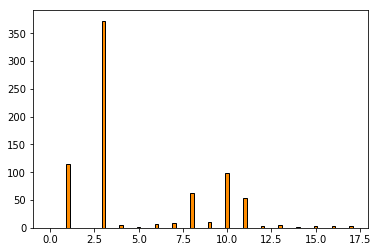

In [260]:
plt.bar(X_points , selector.scores_, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [261]:
#STEP 3:Trying out a variety of classifiers and tuning them as well 

In [262]:
#Splitting data into training and testing set
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(X_new, y, test_size=0.30, random_state=42)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [263]:
#Trial 1: Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier

parameters={'criterion':('gini','entropy'),'splitter':('best','random')}
dtc = DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)

clf.fit(features_train, labels_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)
pred=clf.predict(features_test)
print ("\naccuracy_score : ",accuracy_score(labels_test,pred))
print ('\nprecision : \n',precision_score(labels_test,pred))
print ('\nrecall : \n',recall_score(labels_test,pred))

Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

accuracy_score :  0.7985074626865671

precision : 
 0.7938144329896907

recall : 
 0.6936936936936937


In [264]:
#Trial 2: SVC
from sklearn.svm import SVC

parameters={'C':(0.1,1,10,100),'kernel':('linear','rbf','poly')}
svc=SVC()
clf=GridSearchCV(svc,parameters)

clf.fit(features_train, labels_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)
pred=clf.predict(features_test)
print ("\naccuracy_score : ",accuracy_score(labels_test,pred))
print ('\nprecision : \n',precision_score(labels_test,pred))
print ('\nrecall : \n',recall_score(labels_test,pred))

Best estimator found by grid search:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

accuracy_score :  0.7947761194029851

precision : 
 0.8333333333333334

recall : 
 0.6306306306306306


In [265]:
#Trial 3: Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(features_train, labels_train)

pred=clf.predict(features_test)
print ("\naccuracy_score : ",accuracy_score(labels_test,pred))
print ('\nprecision : \n',precision_score(labels_test,pred))
print ('\nrecall : \n',recall_score(labels_test,pred))


accuracy_score :  0.7388059701492538

precision : 
 0.7530864197530864

recall : 
 0.5495495495495496


In [266]:
#Now that we've got our final trained algorithm DTC, we we'll retrain it again. This time with the entire training dataset.

dtc.fit(X_new, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [267]:
#now let us import data from test file and predict the survival
feature_list=['PassengerId','Pclass','Name','Sex', 'Age','SibSp','Parch',
                                                   'Ticket','Fare','Cabin','Embarked']
df_test_features=pd.read_csv("test.csv",usecols=feature_list)

#data-preprocessing
#DATA PRE-PROCESSING

#replacing 'male' with 1 and 'female' with 0 in the 'sex' column
df_test_features=df_test_features.replace('male',1)
df_test_features=df_test_features.replace('female',0)

#extracting the numerical part of the ticket number
c=5
for s in df_test_features.iloc[:,7]:
    if isinstance(s,str):
        value=[int(s) for s in s.split(' ') if s.isdigit()]
        if (len(value)!=0):
            tktnum=value[0]
        else:
            tktnum=-1
        if (c>0):
            c-=1
        df_test_features=df_test_features.replace(s,tktnum)

#In 'embarked' column, replacing 'S' by 1,'C' by 2 and 'Q' by 3
df_test_features=df_test_features.replace({"S":1,"C":2,"Q":3})

#Extracting only the surnames
for s in df_test_features.iloc[:,2]:
    if (len(s)!=0):
        value=[s for s in s.split(',')]
        surname=value[0]
    df_test_features=df_test_features.replace(s,surname)

#finding the list of unique surnames present and assigning them a numerical value
ls=df_test_features.Name.unique()
df_test_features=df_test_features.replace(ls,range(len(ls)))

#For cases where a passenger has more than one cabin number, extra features will be added. 
#If a person has two cabins, then 4 features will be added. 2 for alpha. part and 2 for numerical part.    
#splitting cabin number in two parts: cabin1 : contains the alphabetical part and cabin2 : contains the numerical part

#first let us find the maximum number of cabins a passenger has.
Max=0
for s in df_test_features.iloc[:,9]:
    if isinstance(s,str):
        value=[s for s in s.split(' ')]
        if (Max<len(value)):
            Max=len(value)
print ('maximum number of cabins a passenger has : ',Max)

#now let us add the required number of features with default values for each row. Later on the value of a row will be changed as 
#'needed'
x=range(Max)
for i in x:
    df_test_features.loc[:,'ap'+str(i)]=-1
    df_test_features.loc[:,'np'+str(i)]=-1
    feature_list.append('ap'+str(i))
    feature_list.append('np'+str(i))
#now let us fill in the apprpriate values in these new columns
ap=11
np=12
rowin=0

for s in df_test_features.iloc[:,9]:
    if isinstance(s,str):
        #print (s)
        #print (type(s))
        value=[s for s in s.split(' ')]
        for cn in value:
            #print (cn[0])
            #print (cn[1:])
            #print (ap)
            df_test_features.iloc[rowin,ap]=ord(cn[0])
            if (cn[1:]!=''):
                df_test_features.iloc[rowin,np]=int(cn[1:])
            else:
                df_test_features.iloc[rowin,np]=-1
            ap+=2
            np+=2
    ap=11
    np=12
    rowin+=1
    
            
#finally removing the original 'cabin' column
df_test_features=df_test_features.drop(columns=['Cabin'])
#removing from features list as well
del feature_list[feature_list.index('Cabin')]

#replacing all the missing values in age column by mean age
mean_age=df_test_features['Age'].mean()
df_test_features['Age']=df_test_features['Age'].fillna(mean_age)

#there are two nan values present in 'Embarked' column. we are replacing it with median value
median=df_test_features['Embarked'].median()
df_test_features['Embarked']=df_test_features['Embarked'].fillna(median)


maximum number of cabins a passenger has :  4


In [268]:
#checking for any NAN values left
l=[]
for i in feature_list:
    x=df_test_features[i].isnull().sum().sum()
    if x>0:
        print (x)
        l.append(i)
for i in l:
    print (i)

1
Fare


In [269]:
avg_fare=df_test_features['Fare'].mean()
df_test_features['Fare']=df_test_features['Fare'].fillna(avg_fare)

In [270]:
X=df_test_features.values
print (X.shape)

(418, 18)


In [271]:
#Converting dataframe to numpy arrays for further use


#First, let us do feature scalling so that no feature gets more importance simply based on it's numerical value
#feature scalling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

#using previously selected features
X_new=selector.transform(X)
print ('shape of X_new ',X_new.shape)
try:
    X_points = range(X.shape[1])
except IndexError:
    X_points = 1




shape of X_new  (418, 7)


In [272]:
# Decision Tree Classifier 

pred=dtc.predict(X_new)

In [273]:
print (pred.shape)

(418,)


In [275]:
x =range(892,1310)
#creating the submission file
submission=pd.DataFrame({'PassengerId':x,'Survived':pred})
submission.to_csv(path_or_buf='E:/surya/work/kaggle titanic dataset/submission.csv',index=False)

In [276]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
